In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

Reading Data

In [3]:
df = pd.read_csv("your_data.csv")

Univariate Data Analysis

Target (Smoking) Disribution

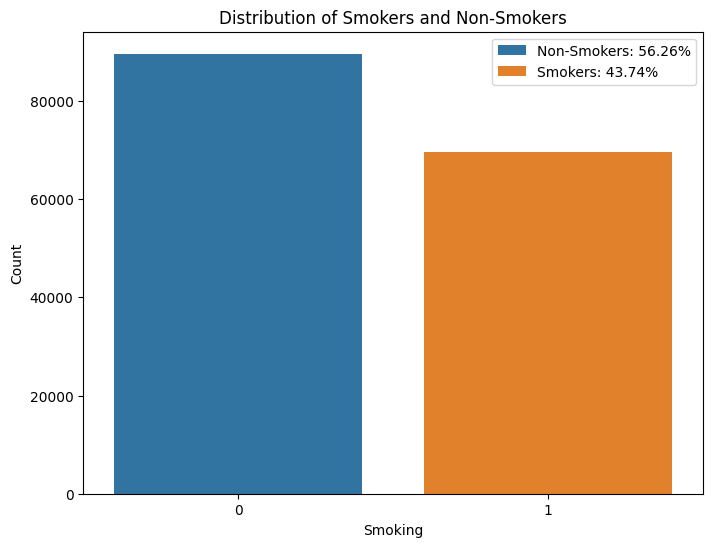

In [4]:
target = df[["smoking"]]
num_samples = len(df)
smokers_count = len(df[df["smoking"] == 1])
nonsmokers_count = len(df[df["smoking"] == 0])
somkers_percentage = 100 * smokers_count/num_samples
nonsmokers_percentage = 100 * nonsmokers_count/num_samples
plt.figure(figsize=(8, 6))
sns.countplot(x="smoking", data=df, hue="smoking")
plt.xlabel('Smoking')
plt.ylabel('Count')
plt.title('Distribution of Smokers and Non-Smokers')
plt.legend(labels=[f'Non-Smokers: {round(nonsmokers_percentage,2)}%',  f"Smokers: {round(somkers_percentage,2)}%"])

plt.show()

# **Feature 1: hemoglobin**

Observations: 
1- The distribution for hemoglobin is almost gaussian, but is skewed to the left

2- Hemoglobin for smokers is on average higher than for non smokers

Hemoglobin:
Mean 14.797
Median 15.0
Max Value 21.0
Min Value 4.9
Range 16.1
Standard Deviation 1.431
Skew -0.634
IQR 2.0


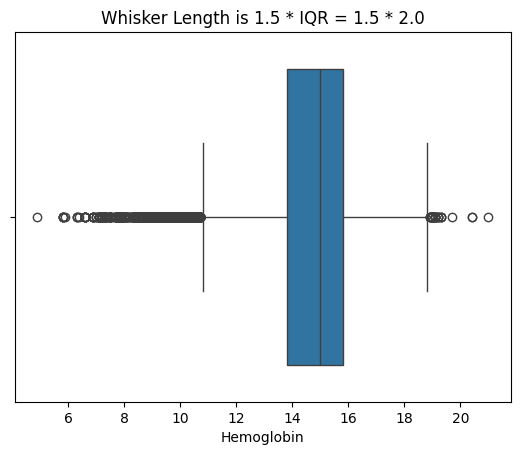

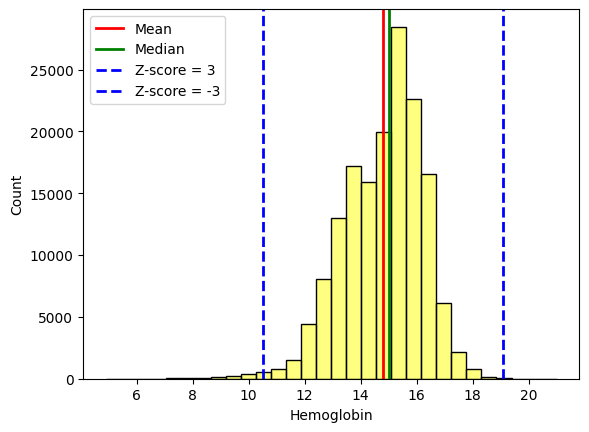

In [5]:
# Analyzing Hemoglobin Feature without information about the target
hemoglobin_feature = df["hemoglobin"]

# Central Tendency Measures
hemoglobin_mean = hemoglobin_feature.mean()
hemoglobin_median = hemoglobin_feature.median()

# Measures of Dispersion
hemoglobin_max_val = hemoglobin_feature.max()
hemoglobin_min_val = hemoglobin_feature.min()
hemoglobin_range = hemoglobin_max_val - hemoglobin_min_val
hemoglobin_std = hemoglobin_feature.std()
hemoglobin_skew = hemoglobin_feature.skew()
hemoglobin_iqr = hemoglobin_feature.quantile(0.75) - hemoglobin_feature.quantile(0.25)
z_score_positive3 = 3 * hemoglobin_std + hemoglobin_mean
z_score_negative3 = -3 * hemoglobin_std + hemoglobin_mean

print("Hemoglobin:")
print(f"Mean {round(hemoglobin_mean, 3)}")
print(f"Median {round(hemoglobin_median, 3)}")
print(f"Max Value {round(hemoglobin_max_val, 3)}")
print(f"Min Value {round(hemoglobin_min_val, 3)}")
print(f"Range {round(hemoglobin_range, 3)}")
print(f"Standard Deviation {round(hemoglobin_std, 3)}")
print(f"Skew {round(hemoglobin_skew, 3)}")
print(f"IQR {round(hemoglobin_iqr, 3)}")


# Box Plot for Hemoglobin Feature
sns.boxplot(x=hemoglobin_feature)
plt.xlabel('Hemoglobin')
plt.title(f"Whisker Length is 1.5 * IQR = 1.5 * {round(hemoglobin_iqr, 3)}")
plt.show()

# Histogram for Hemoglobin Feature
sns.histplot(hemoglobin_feature, bins=30, alpha=0.5, color="yellow")
plt.xlabel('Hemoglobin')
plt.ylabel('Count')
plt.axvline(hemoglobin_mean, c='red', ls='-', lw=2)
plt.axvline(hemoglobin_median, c='green', ls='-', lw=2)
plt.axvline(z_score_positive3, c='blue', ls='--', lw=2)
plt.axvline(z_score_negative3, c='blue', ls='--', lw=2)

plt.legend(labels=['Mean', 'Median', "Z-score = 3", "Z-score = -3"])
plt.show()

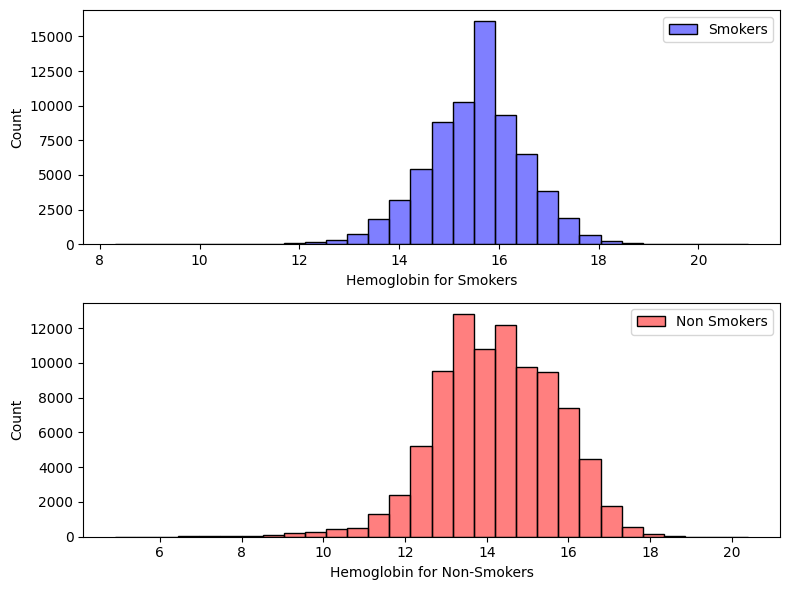

In [25]:
# Separate data for smokers and non-smokers based on 'Hemoglobin' levels
hemoglobin_smokers = df[df['smoking'] == 1]['hemoglobin']
hemoglobin_nonsmokers = df[df['smoking'] == 0]['hemoglobin']

# Creating subplots with two histograms stacked vertically for 'Hemoglobin'
plt.figure(figsize=(8, 6))  # Adjust figure size if needed

plt.subplot(2, 1, 1)
sns.histplot(data=hemoglobin_smokers, color='blue', alpha=0.5, bins=30, label='Smokers')
plt.xlabel('Hemoglobin for Smokers')
plt.legend()

plt.subplot(2, 1, 2)
sns.histplot(data=hemoglobin_nonsmokers, color='red', alpha=0.5, bins=30, label='Non Smokers')
plt.xlabel('Hemoglobin for Non-Smokers')
plt.legend()

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

Feature 3: Dental Carries

Observations:
1- Most Individuals Don't Have Dental Carries

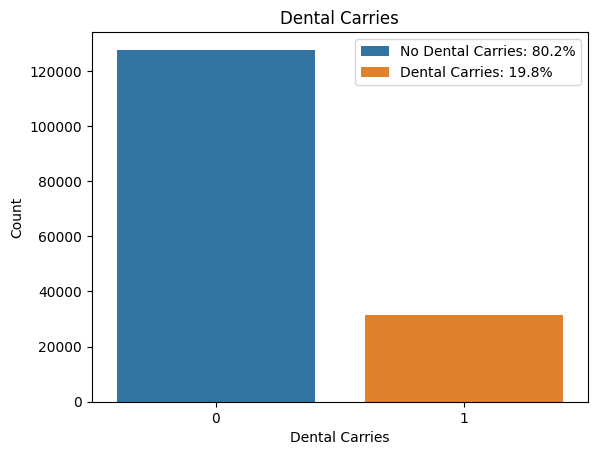

In [7]:
# Analyzing Dental Carries Feature without information about the target

dental_feature = df[["dental caries"]]
dental_carries_percentage = 100 * len(df[df["dental caries"]==1]) / num_samples
no_dental_carries_percentage = 100 * len(df[df["dental caries"]== 0]) / num_samples



# Histogram for Dental Carries Feature
sns.countplot(x="dental caries", data=df, hue="dental caries")
plt.xlabel('Dental Carries')
plt.ylabel('Count')
plt.title('Dental Carries')
plt.legend(labels=[f'No Dental Carries: {round(no_dental_carries_percentage,2)}%',  f"Dental Carries: {round(dental_carries_percentage,2)}%"])
plt.show()





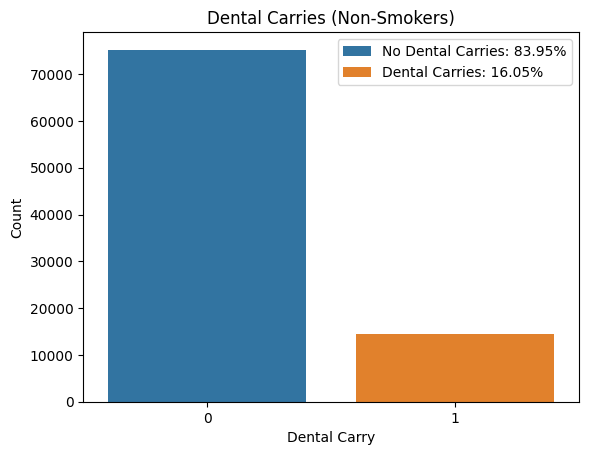

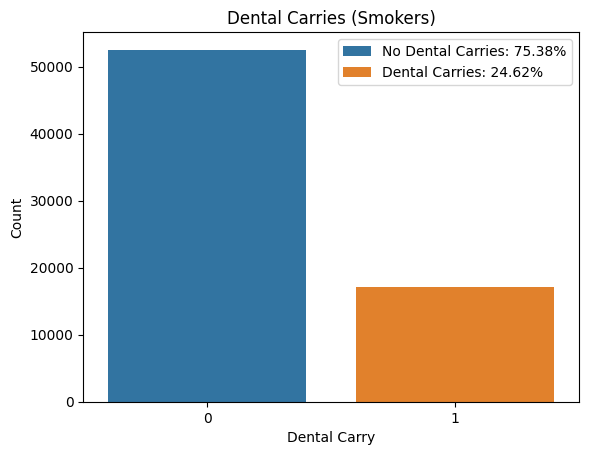

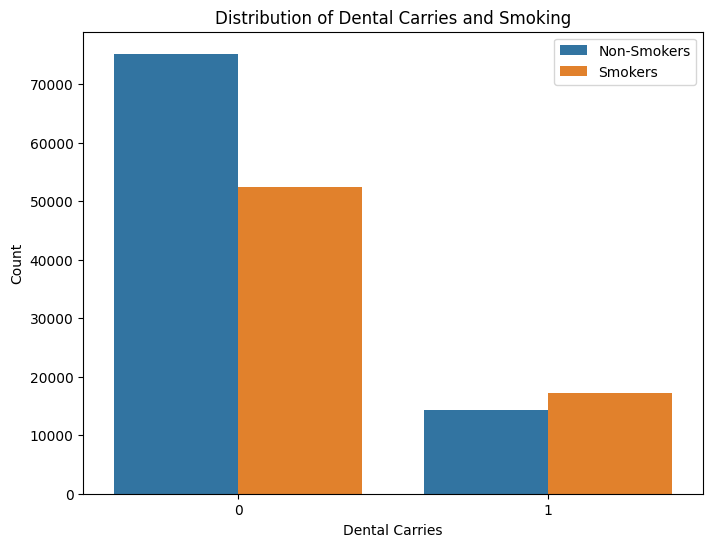

In [11]:
# Analyzing Dental Carries Feature For Non-Smokers
dental_nonsmokers = df[df["smoking"] == 0][["dental caries"]]

dental_carries_percentage_nonsmokers = 100 * len(dental_nonsmokers[dental_nonsmokers["dental caries"]==1]) / len(dental_nonsmokers)
no_dental_carries_percentage__nonsmokers = 100 * len(dental_nonsmokers[dental_nonsmokers["dental caries"]== 0]) / len(dental_nonsmokers)

# Histogram for Dental Carries For Non Smokers
sns.countplot(x="dental caries", data=dental_nonsmokers, hue="dental caries")
plt.xlabel('Dental Carry')
plt.ylabel('Count')
plt.title('Dental Carries (Non-Smokers)')
plt.legend(labels=[f'No Dental Carries: {round(no_dental_carries_percentage__nonsmokers,2)}%',  f"Dental Carries: {round(dental_carries_percentage_nonsmokers,2)}%"])
plt.show()

# Analyzing Dental Carries Feature For Smokers
dental_smokers = df[df["smoking"] == 1][["dental caries"]]

dental_carries_percentage_smokers = 100 * len(dental_smokers[dental_smokers["dental caries"]==1]) / len(dental_smokers)
no_dental_carries_percentage__smokers = 100 * len(dental_smokers[dental_smokers["dental caries"]== 0]) / len(dental_smokers)

# Histogram for Dental Carries For Smokers
sns.countplot(x="dental caries", data=dental_smokers, hue="dental caries")
plt.xlabel('Dental Carry')
plt.ylabel('Count')
plt.title('Dental Carries (Smokers)')
plt.legend(labels=[f'No Dental Carries: {round(no_dental_carries_percentage__smokers,2)}%',  f"Dental Carries: {round(dental_carries_percentage_smokers,2)}%"])
plt.show()


# Hearing Feature with respect to the target
plt.figure(figsize=(8, 6))
sns.countplot(x="dental caries", data=df, hue="smoking")
plt.xlabel('Dental Carries')
plt.ylabel('Count')
plt.title('Distribution of Dental Carries and Smoking')
plt.legend(labels=["Non-Smokers", "Smokers"])
plt.show()

Feature 5: LDL

Observation: Data Resembles a Gausian Distribution after removing outliers with LDL > 500.
LDL is slightly higher for smokers on average.

LDL:
Mean 114.608
Median 114.0
Max Value 1860
Min Value 1
Range 1859
Standard Deviation 28.159
Skew 6.875
IQR 38.0


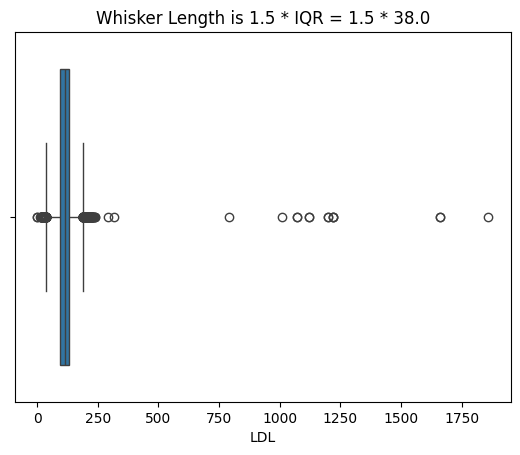

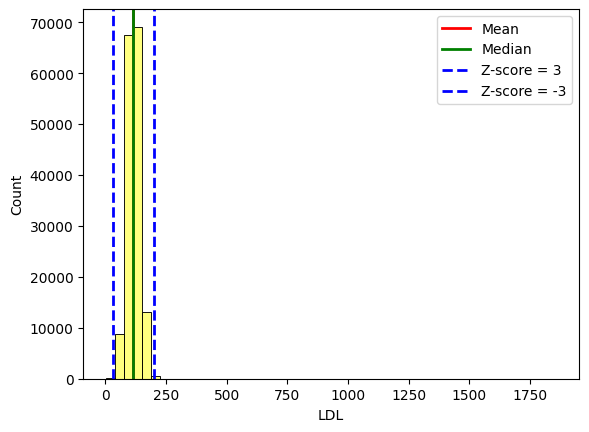

In [14]:
# Analyzing LDL Feature without information about the target
LDL_feature = df["LDL"]

# Central Tendency Measures
LDL_mean = LDL_feature.mean()
LDL_median = LDL_feature.median()

# Measures of Dispersion
LDL_max_val = LDL_feature.max()
LDL_min_val = LDL_feature.min()
LDL_range = LDL_max_val - LDL_min_val
LDL_std = LDL_feature.std()
LDL_skew = LDL_feature.skew()
LDL_iqr = LDL_feature.quantile(0.75) - LDL_feature.quantile(0.25)
z_score_positive3 = 3 * LDL_std + LDL_mean
z_score_negative3 = -3 * LDL_std + LDL_mean

print("LDL:")
print(f"Mean {round(LDL_mean, 3)}")
print(f"Median {round(LDL_median, 3)}")
print(f"Max Value {round(LDL_max_val, 3)}")
print(f"Min Value {round(LDL_min_val, 3)}")
print(f"Range {round(LDL_range, 3)}")
print(f"Standard Deviation {round(LDL_std, 3)}")
print(f"Skew {round(LDL_skew, 3)}")
print(f"IQR {round(LDL_iqr, 3)}")


# Box Plot for LDL Feature
sns.boxplot(x=LDL_feature)
plt.xlabel('LDL')
plt.title(f"Whisker Length is 1.5 * IQR = 1.5 * {round(LDL_iqr, 3)}")
plt.show()

# Histogram for LDL Feature
sns.histplot(LDL_feature, bins=50, alpha=0.5, color="yellow")
plt.xlabel('LDL')
plt.ylabel('Count')
plt.axvline(LDL_mean, c='red', ls='-', lw=2)
plt.axvline(LDL_median, c='green', ls='-', lw=2)
plt.axvline(z_score_positive3, c='blue', ls='--', lw=2)
plt.axvline(z_score_negative3, c='blue', ls='--', lw=2)

plt.legend(labels=['Mean', 'Median', "Z-score = 3", "Z-score = -3"])
plt.show()


Analysis after removing outliers ( LDL > 500)

LDL:
Mean 114.508
Median 114.0
Max Value 318
Min Value 1
Range 317
Standard Deviation 25.961
Skew 0.132
IQR 38.0


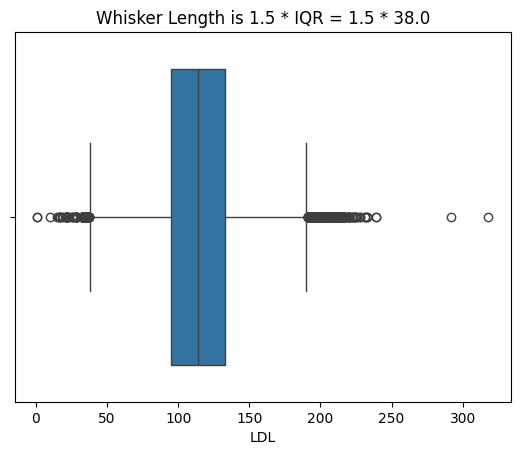

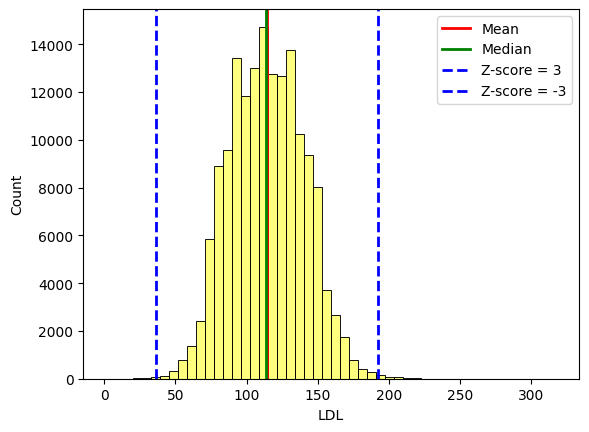

In [18]:
#Analysis After Removing Outliers

# Analyzing LDL Feature without information about the target
LDL_feature = df[df["LDL"] < 500]["LDL"]

# Central Tendency Measures
LDL_mean = LDL_feature.mean()
LDL_median = LDL_feature.median()

# Measures of Dispersion
LDL_max_val = LDL_feature.max()
LDL_min_val = LDL_feature.min()
LDL_range = LDL_max_val - LDL_min_val
LDL_std = LDL_feature.std()
LDL_skew = LDL_feature.skew()
LDL_iqr = LDL_feature.quantile(0.75) - LDL_feature.quantile(0.25)
z_score_positive3 = 3 * LDL_std + LDL_mean
z_score_negative3 = -3 * LDL_std + LDL_mean

print("LDL:")
print(f"Mean {round(LDL_mean, 3)}")
print(f"Median {round(LDL_median, 3)}")
print(f"Max Value {round(LDL_max_val, 3)}")
print(f"Min Value {round(LDL_min_val, 3)}")
print(f"Range {round(LDL_range, 3)}")
print(f"Standard Deviation {round(LDL_std, 3)}")
print(f"Skew {round(LDL_skew, 3)}")
print(f"IQR {round(LDL_iqr, 3)}")


# Box Plot for LDL Feature
sns.boxplot(x=LDL_feature)
plt.xlabel('LDL')
plt.title(f"Whisker Length is 1.5 * IQR = 1.5 * {round(LDL_iqr, 3)}")
plt.show()

# Histogram for LDL Feature
sns.histplot(LDL_feature, bins=50, alpha=0.5, color="yellow")
plt.xlabel('LDL')
plt.ylabel('Count')
plt.axvline(LDL_mean, c='red', ls='-', lw=2)
plt.axvline(LDL_median, c='green', ls='-', lw=2)
plt.axvline(z_score_positive3, c='blue', ls='--', lw=2)
plt.axvline(z_score_negative3, c='blue', ls='--', lw=2)

plt.legend(labels=['Mean', 'Median', "Z-score = 3", "Z-score = -3"])
plt.show()

LDL
Mean for Non Smokers: 112.24
Standard Deviation for Non Smokers: 25.11
Mean for Smokers: 116.27
Standard Deviation for Smokers: 26.47


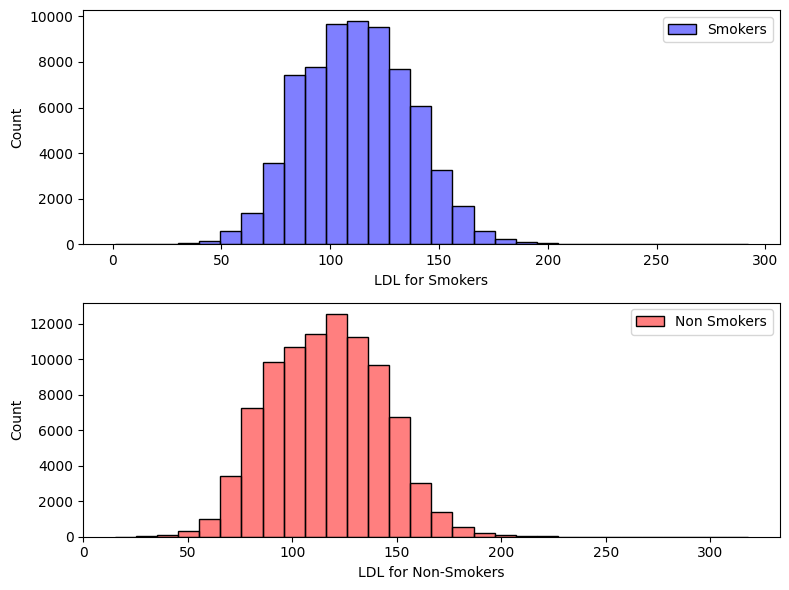

In [29]:
# Separate data for smokers and non-smokers based on 'LDL' levels
df_LDL_outliers_removed = df[df["LDL"] < 500]

LDL_smokers = df_LDL_outliers_removed[df_LDL_outliers_removed['smoking'] == 1]['LDL']
LDL_nonsmokers = df_LDL_outliers_removed[df_LDL_outliers_removed['smoking'] == 0]['LDL']

print("LDL:")
print("Mean for Non Smokers:", round(LDL_smokers.mean(), 2))
print("Standard Deviation for Non Smokers:", round(LDL_smokers.std(), 2))
print("Mean for Smokers:", round(LDL_nonsmokers.mean(), 2))
print("Standard Deviation for Smokers:", round(LDL_nonsmokers.std(),2))

# Creating subplots with two histograms stacked vertically
plt.figure(figsize=(8, 6))  # Adjust figure size if needed

plt.subplot(2, 1, 1)
sns.histplot(data=LDL_smokers, color='blue', alpha=0.5, bins=30, label='Smokers')
plt.xlabel('LDL for Smokers')
plt.legend()

plt.subplot(2, 1, 2)
sns.histplot(data=LDL_nonsmokers, color='red', alpha=0.5, bins=30, label='Non Smokers')
plt.xlabel('LDL for Non-Smokers')
plt.legend()

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


# **Feature 2** : Hearing

Hearing:
Mean 1.023
Median 1.0
Max Value 2
Min Value 1
Range 1
Standard Deviation 0.151
Skew 6.302
IQR 0.0


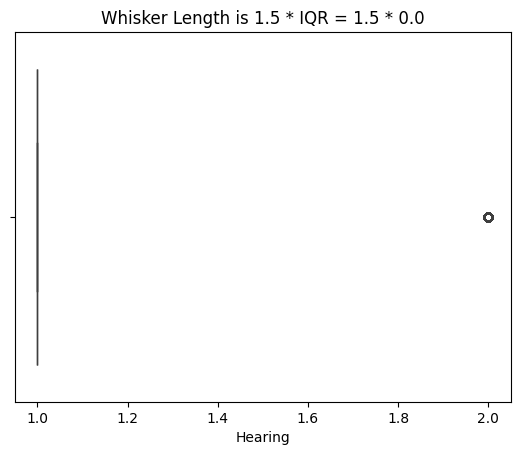

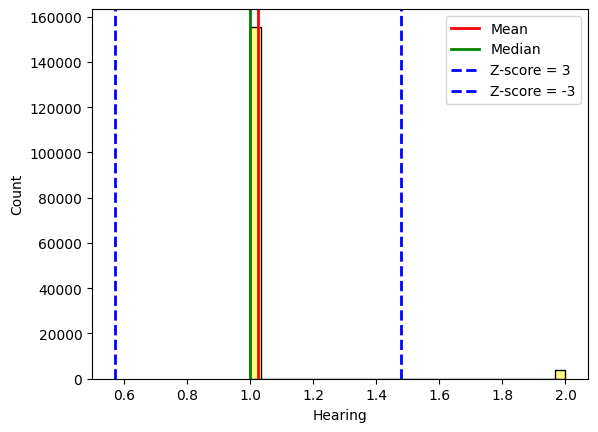

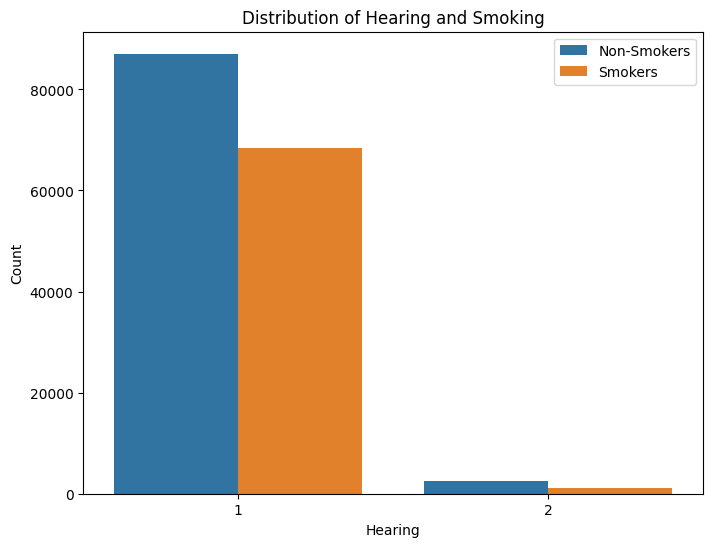

In [5]:
hearing_feature = df['hearing(right)']
label = df["smoking"]

# Central Tendency Measures
hearing_mean = hearing_feature.mean()
hearing_median = hearing_feature.median()

# Measures of Dispersion
hearing_max_val = hearing_feature.max()
hearing_min_val = hearing_feature.min()
hearing_range = hearing_max_val - hearing_min_val
hearing_std = hearing_feature.std()
hearing_skew = hearing_feature.skew()
hearing_iqr = hearing_feature.quantile(0.75) - hearing_feature.quantile(0.25)
z_score_positive3 = 3 * hearing_std + hearing_mean
z_score_negative3 = -3 * hearing_std + hearing_mean

print("Hearing:")
print(f"Mean {round(hearing_mean, 3)}")
print(f"Median {round(hearing_median, 3)}")
print(f"Max Value {round(hearing_max_val, 3)}")
print(f"Min Value {round(hearing_min_val, 3)}")
print(f"Range {round(hearing_range, 3)}")
print(f"Standard Deviation {round(hearing_std, 3)}")
print(f"Skew {round(hearing_skew, 3)}")
print(f"IQR {round(hearing_iqr, 3)}")

# Box Plot for Hearing Feature
sns.boxplot(x=hearing_feature)
plt.xlabel('Hearing')
plt.title(f"Whisker Length is 1.5 * IQR = 1.5 * {round(hearing_iqr, 3)}")
plt.show()

# Histogram for Hearing Feature
sns.histplot(hearing_feature, bins=30, alpha=0.5, color="yellow")
plt.xlabel('Hearing')
plt.ylabel('Count')
plt.axvline(hearing_mean, c='red', ls='-', lw=2)
plt.axvline(hearing_median, c='green', ls='-', lw=2)
plt.axvline(z_score_positive3, c='blue', ls='--', lw=2)
plt.axvline(z_score_negative3, c='blue', ls='--', lw=2)

plt.legend(labels=['Mean', 'Median', "Z-score = 3", "Z-score = -3"])
plt.show()

# Hearing Feature with respect to the target
plt.figure(figsize=(8, 6))
sns.countplot(x="hearing(right)", data=df, hue="smoking")
plt.xlabel('Hearing')
plt.ylabel('Count')
plt.title('Distribution of Hearing and Smoking')
plt.legend(labels=["Non-Smokers", "Smokers"])
plt.show()
